# A less basic backprop example

The last notebook walked through an implementation of backpropagation for a small linear network with a single weight matrix and no bias. It ended with an example problem, *XOR*, that linear networks aren't able to solve. Here, we'll introduce a single hidden layer to this network to increase its expressivity and allow it solve the XOR problem. 

As part of this process, we'll work towards the implemention of a more generalizable backprop training loop.

First, though, let's go over the problem again.

## XOR

Exclusive OR, or XOR, is a logical operation on two inputs which evaluates to 1 if the inputs are different, and 0 if they are the same. Formally, 

$XOR(a, b) = \begin{cases}
    1, & \text{if}~~~ a \neq b \\
    0, & \text{otherwise}
\end{cases}$

This problem is not linearly separable, in that it is impossible to draw a straight line separating the inputs which evaluate to 1 from those which evaluate to 0. See the plot below.

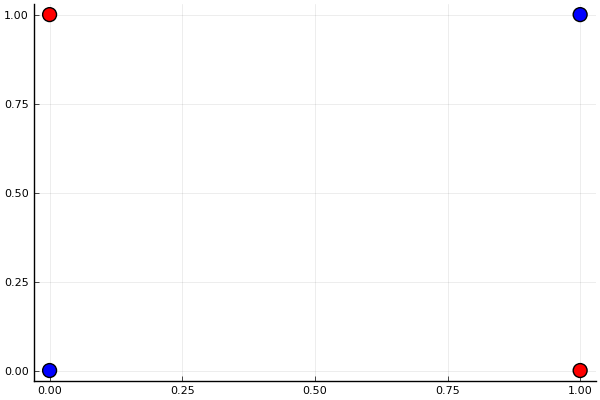

In [1]:
using Plots; pyplot()

X = [0 0; 1 1; 0 1; 1 0]
y = [0, 0, 1, 1]

scatter(X[:, 1], X[:, 2], color=[:blue, :blue, :red, :red], markersize=10, legend=false)

These four points $X$ and their corresponding XOR value $y$ will be our dataset.

$X = \begin{pmatrix} 0 & 0 \\ 1 & 1 \\ 0 & 1 \\ 1 & 0 \end{pmatrix}$

$y = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 1 \end{pmatrix}$

Now, we need to extend our previous linear model to include a hidden layer. Practically, this means two weight matrices, $W^1$ and $W^2$, where the superscript denotes the layer number. Like last time, we have two *features* as input. Rather than going from 2 features to 1 output node, however, we'll go from 2 features to 3 hidden nodes, and then from the 3 hidden nodes to 1 output node. For simplicity, both layers will use the sigmoid activation function.

<br>

---

*N.B. it is sufficient to have just 2 hidden nodes to solve this problem, but using 3 helps us keep the orientation of our matrices straight and is helpful for instruction.*

---

<br>

Putting this together, we have our model.

$o^1 = \sigma(XW^1)$

$o^2 = \sigma(o^1 W^2)$

where

$X \in \mathbb{R}^{4 \times 2}$ the input data

$W^1 \in \mathbb{R}^{2 \times 3}$ the hidden layer weights

$W^2 \in \mathbb{R}^{3 \times 1}$ the output weights

$\sigma(z)= \frac{1}{1 + e^{-z}}$  the sigmoid activation function


We define and initialize the weights and sigmoid function below.

In [2]:
W1 = [0.1 0.1 0.1; 0.1 0.1 0.1]
W2 = [0.1, 0.1, 0.1]

function σ(z)
    # Sigmoid activation function
    return @. 1 / (1 + exp(-z))
end

σ (generic function with 1 method)

## The forward pass

We start by computing the hidden layer output value, $o^1$.

$z^1 = XW^1 = 
    \begin{pmatrix} 0 & 0 \\ 1 & 1 \\ 0 & 1 \\ 1 & 0 \end{pmatrix} 
    \begin{pmatrix} 0.1 & 0.1 & 0.1 \\ 0.1 & 0.1 & 0.1 \end{pmatrix}
    = 
    \begin{pmatrix} 0 & 0 & 0 \\ 0.2 & 0.2 & 0.2 \\ 0.1 & 0.1 & 0.1 \\ 0.1 & 0.1 & 0.1 \end{pmatrix}$
    
$o^1 = \sigma(z^1) = \begin{pmatrix} 
                0.5 & 0.5 & 0.5 \\
                0.55 & 0.55 & 0.55 \\
                0.52 & 0.52 & 0.52 \\
                0.52 & 0.52 & 0.52
               \end{pmatrix}$

Then, the network output $o^2$.
               
$z^2 = o^1 W^2 = 
    \begin{pmatrix} 0.5 & 0.5 & 0.5 \\0.55 & 0.55 & 0.55 \\ 0.52 & 0.52 & 0.52 \\ 0.52 & 0.52 & 0.52 \end{pmatrix} 
    \begin{pmatrix} 0.1 \\ 0.1 \\ 0.1 \end{pmatrix}
    = 
    \begin{pmatrix} 0.15 \\ 0.165 \\ 0.156 \\ 0.156 \end{pmatrix}
$

$o^2 = \sigma(z^2) =
    \begin{pmatrix} 0.537 \\ 0.541 \\ 0.539 \\ 0.539 \end{pmatrix}
$

In [3]:
z1 = X * W1
o1 = σ(z1)
z2 = o1 * W2
o2 = σ(z2)

println("z1: $z1")
println("o1: $o1")
println("z2: $z2")
println("o2: $o2")

z1: [0.0 0.0 0.0; 0.2 0.2 0.2; 0.1 0.1 0.1; 0.1 0.1 0.1]
o1: [0.5 0.5 0.5; 0.549833997312478 0.549833997312478 0.549833997312478; 0.52497918747894 0.52497918747894 0.52497918747894; 0.52497918747894 0.52497918747894 0.52497918747894]
z2: [0.15000000000000002, 0.1649501991937434, 0.157493756243682, 0.157493756243682]
o2: [0.5374298453437496, 0.5411443022794791, 0.5392922545992791, 0.5392922545992791]


We will now apply our decision function to the values of $o^2$ to get the predicted $y$ values $\hat{y}$ and compute the accuracy of the model. As a reminder, our decision function is a simple threshold

$\hat{y} = \begin{cases}
    1, & \text{if}~~~ o \ge 0.5 \\
    0, & \text{otherwise}
\end{cases}$

The relevant functions and the output of our initial model are below.

In [4]:
function decision(o)
    return Int.(o .>= 0.5)
end

function accuracy(y, y_hat)
    N = size(y, 1)
    return sum(y .== y_hat) / N
end

y_hat = decision(o2)
acc = accuracy(y, y_hat)
println(y)
println(y_hat)
println("Accuracy: $acc")

[0, 0, 1, 1]
[1, 1, 1, 1]
Accuracy: 0.5


We can also compute the loss of our initial model. Since this is still a binary classification problem, we'll use binary cross entropy again.

$C = -\frac{1}{N} \sum_{i=1}^{N} y_i \times ln(o_i) + (1 - y_i) \times ln(1 - o_i)$

In [5]:
function clip(a, lo=1e-15, hi=1 - 1e-15)
    if a < lo
        return lo
    elseif a > hi
        return hi
    else
        return a
    end
end

function binary_crossentropy(y, o)
    N = size(y, 1)
    # We "clip" the predicted values to avoid
    # domain errors in the log() function if our
    # model happens to predict 0.0, and to prevent
    # log returning 0.0 if the model predicts 1.0
    o = clip.(o)
    ces = @. (y * log(o)) + ((1-y) * log(1-o))
    return (-1/N) * sum(ces)
end

loss = binary_crossentropy(y, o2)
println("Initial loss: $loss")

Initial loss: 0.6962429568948773


## The backward pass

Okay, the easy part is over. Now we have to compute the partial derivatives of each of the weights (from both weight matrices) with respect to the loss. We'll go through the equations at a high level first, so we can see how they fit together, then we'll get down to computing exactly what everything is.

The partial wrt $W^2$ is analogous to the partial we computed for the linear model. That is,

$\frac{\partial{C}}{\partial{W^2}} =
    \frac{\partial{C}}{\partial{o^2}}
    \frac{d{o^2}}{d{z^2}}
    \frac{\partial{z^2}}{\partial{W^2}}
$

The partial wrt $W^1$ is a bit more involved,

$\frac{\partial{C}}{\partial{W^1}} =
    \frac{\partial{C}}{\partial{o^2}}
    \frac{d{o^2}}{d{z^2}}
    \frac{\partial{z^2}}{\partial{o^1}}
    \frac{d{o^1}}{d{z^1}}
    \frac{\partial{z^1}}{\partial{W^1}}
$

We can simplify this a bit, however, by noticing that the first two terms of $\frac{\partial{C}}{\partial{W^2}}$, namely $\frac{\partial{C}}{\partial{o^2}} \frac{d{o^2}}{d{z^2}}$, occur in both equations. We'll assign this operation the name $\delta^2$.

$\delta^2 = \frac{\partial{C}}{\partial{o^2}} \frac{d{o^2}}{d{z^2}}$

$\frac{\partial{C}}{\partial{W^2}} =
    \delta^2
    \frac{\partial{z^2}}{\partial{W^2}}
$

$\frac{\partial{C}}{\partial{W^1}} =
    \delta^2
    \frac{\partial{z^2}}{\partial{o^1}}
    \frac{d{o^1}}{d{z^1}}
    \frac{\partial{z^1}}{\partial{W^1}}
$

Before we go any further, let's look at the shapes. First for the forward pass:

$X \in \mathbb{R}^{4 \times 2}$

$W^1 \in \mathbb{R}^{2 \times 3}$

$z^1 = XW^1 \in \mathbb{R}^{4 \times 3}$

$o^1 = \sigma(z^1) \in \mathbb{R}^{4 \times 3}$

$W^2 \in \mathbb{R}^{3 \times 1}$

$z^2 = o^1W^2 \in \mathbb{R}^{4 \times 1}$

$o^2 = \sigma(z^2) \in \mathbb{R}^{4 \times 1}$

Then the backward pass:

$\frac{\partial{C}}{\partial{o^2}} \in \mathbb{R}^{4 \times 1}$ (same shape as $o^2$)

$\frac{d{o^2}}{d{z^2}} \in \mathbb{R}^{4 \times 1}$ (same shape as $z^2$)

$\frac{\partial{z^2}}{\partial{W^2}} = o^1 \in \mathbb{R}^{4 \times 3}$

$\frac{\partial{z^2}}{\partial{o^1}} = W^2 \in \mathbb{R}^{3 \times 1}$

$\frac{d{o^1}}{d{z^1}} \in \mathbb{R}^{4 \times 3}$ (same shape as $z^1$)

$\frac{\partial{z^1}}{\partial{W^1}} = X \in \mathbb{R}^{4 \times 2}$

### Output layer weights $W^2$
---

$\frac{\partial{C}}{\partial{W^2}} =
    \frac{\partial{C}}{\partial{o^2}}
    \frac{d{o^2}}{d{z^2}}
    \frac{\partial{z^2}}{\partial{W^2}}
$

Now the shapes of the multiplications. First off, $\frac{\partial{C}}{\partial{o^2}}$ and $\frac{d{o^2}}{d{z^2}}$ have the same shape, so we want to compute their Hadamard product:

$\delta^2 = \frac{\partial{C}}{\partial{o^2}} \frac{d{o^2}}{d{z^2}} = \mathbb{R}^{4 \times 1} \odot \mathbb{R}^{4 \times 1} = \mathbb{R}^{4 \times 1}$

But $\frac{\partial{z^2}}{\partial{W^2}} = o^1 \in \mathbb{R}^{4 \times 3}$ so we'll need to transpose $\delta^2$ to get a compatible shape.

$\frac{\partial{C}}{\partial{W^2}} = {\delta^2}^T \frac{\partial{z^2}}{\partial{W^2}} = \mathbb{R}^{1 \times 4} \mathbb{R}^{4 \times 3} = \mathbb{R}^{1 \times 3}$

which transposed is $\mathbb{R}^{3 \times 1}$, so its compatible with $W^2$. This is encouraging, but let's make sure it makes sense by replacing the dimensions with variables indicating their meaning.

$\frac{\partial{C}}{\partial{W^2}} = {\delta^2}^T \frac{\partial{z^2}}{\partial{W^2}} \in \mathbb{R}^{O \times N} \mathbb{R}^{N \times H} = \mathbb{R}^{O \times H}$

$W^2 \in \mathbb{R}^{H ~\times~ O}$

where $N$ is the number of examples, $H$ is the number of hidden nodes, and $O$ is the number of output nodes. 

Looking at the equations this way, we can see that $\frac{\partial{C}}{\partial{W^2}}$ connects the output nodes to the hidden nodes, and that transposing the result does indeed match up the proper dimensions to $W^2$ to allow us to do the weight updates for this layer. Great!


### Hidden layer weights $W^1$
---

$\frac{\partial{C}}{\partial{W^1}} =
    \delta^2
    \frac{\partial{z^2}}{\partial{o^1}}
    \frac{d{o^1}}{d{z^1}}
    \frac{\partial{z^1}}{\partial{W^1}}
$

Next up, $\frac{\partial{C}}{\partial{W^1}}$. We know already that $\delta^2 \in \mathbb{R}^{4 \times 1}$ and $\frac{\partial{z^2}}{\partial{o^1}} = W^2 \in \mathbb{R}^{3 \times 1}$, so 

$\delta^2 \frac{\partial{z^2}}{\partial{o^1}} =
    \delta^2 {\frac{\partial{z^2}}{\partial{o^1}}}^T =
    \delta^2 {W^2}^T \in \mathbb{R}^{4 \times 1} \mathbb{R}^{1 \times 3} =
    \mathbb{R}^{4 \times 3}
$

$\frac{d{o^1}}{d{z^1}} \in \mathbb{R}^{4 \times 3}$ so we take the Hadamard product again.

$\delta^2 {W^2}^T \odot \frac{d{o^1}}{d{z^1}} = \mathbb{R}^{4 \times 3} \mathbb{R}^{4 \times 3} = \mathbb{R}^{4 \times 3}$

For concision's sake we'll define this as another $\delta$

$\delta^1 = \delta^2 {W^2}^T \odot \frac{d{o^1}}{d{z^1}}$

Finally, $\frac{\partial{z^1}}{\partial{W^1}} = X \in \mathbb{R}^{4 \times 1}$ so transposing the previous we get

$\frac{\partial{C}}{\partial{W^1}} = {\delta^1}^T X = \mathbb{R}^{3 \times 4} \mathbb{R}^{4 \times 2} = \mathbb{R}^{3 \times 2}$

Looking at the shapes as our variables again

$\frac{\partial{C}}{\partial{W^1}} = {\delta^1}^T X = \mathbb{R}^{H \times N} \mathbb{R}^{N \times I} = \mathbb{R}^{H \times I}$ where $I$ is the number of input nodes.

So transposing this we get $\mathbb{R}^{I \times H}$ which is the shape of $W^1$ and we're all set!

In [6]:
function ∂C_∂o(y, o)
    num = o .- y
    denom = o .* (1 .- o)
    return num ./ denom
end

function dσ_dz(z)
    o = σ(z)
    return @. o * (1.0 - o)
end

dσ_dz (generic function with 1 method)

In [7]:
function train(X, y, W1, W2, η=1, epochs=50, verbose=0)
    log_at = epochs / 10
    W1_t = copy(W1)
    W2_t = copy(W2)
    N = size(X, 1)
    for t=1:epochs
        # Forward pass
        z1 = X * W1_t
        o1 = σ(z1)
        z2 = o1 * W2_t
        o2 = σ(z2)
        # Print the loss and training set accuracy every log_at epochs.
        if t == 1 || t % log_at == 0
            loss = binary_crossentropy(y, o2)
            acc = accuracy(y, decision(o2))
            println("Training step $t: Loss: $loss, Accuracy: $acc")
            if verbose > 0
                println("W1: $W1_t")
                println("W2: $W2_t")
                println("---")
            end
        end
        # Backward pass
        # Compute the gradients wrt W2 and W1
        δ2 = ∂C_∂o(y, o2) .* dσ_dz(z2)
        ∂C_∂W2 = transpose(δ2) * o1
        δ1 = (δ2 * transpose(W2_t)) .* dσ_dz(z1)
        ∂C_∂W1 = transpose(δ1) * X
        # Update the weights given the gradients
        W2_t = W2_t .- (η * transpose(∂C_∂W2))
        W1_t = W1_t .- (η * transpose(∂C_∂W1))
    end
    return (W1_t, W2_t)  # return the trained weights.
end

train(X, y, W1, W2, 0.1, 100)

Training step 1: Loss: 0.6962429568948773, Accuracy: 0.5
Training step 10: Loss: 0.693802702686104, Accuracy: 0.5
Training step 20: Loss: 0.6932639114382373, Accuracy: 0.5
Training step 30: Loss: 0.6931679623020855, Accuracy: 0.5
Training step 40: Loss: 0.6931508790702442, Accuracy: 0.5
Training step 50: Loss: 0.6931478376644078, Accuracy: 0.5
Training step 60: Loss: 0.693147296198902, Accuracy: 0.5
Training step 70: Loss: 0.6931471998017269, Accuracy: 0.5
Training step 80: Loss: 0.6931471826401677, Accuracy: 0.5
Training step 90: Loss: 0.6931471795848999, Accuracy: 0.5
Training step 100: Loss: 0.6931471790409676, Accuracy: 0.5


([0.09884752543810783 0.09884752543810783 0.09884752543810783; 0.09884752543810783 0.09884752543810783 0.09884752543810783], [9.054280533571092e-5, 9.054280533571092e-5, 9.054280533571092e-5])

## Debugging

What's going on here? We can see the loss is decreasing over the training steps, but incredibly slowly. Let's take advantage of our `verbose` option to get some more details. We'll also train for 1000 iterations just to make sure our model doesn't just need more time.

In [8]:
train(X, y, W1, W2, 0.1, 1000, 1)

Training step 1: Loss: 0.6962429568948773, Accuracy: 0.5
W1: [0.1 0.1 0.1; 0.1 0.1 0.1]
W2: [0.1, 0.1, 0.1]
---
Training step 100: Loss: 0.6931471790409676, Accuracy: 0.5
W1: [0.09884751723491753 0.09884751723491753 0.09884751723491753; 0.09884751723491753 0.09884751723491753 0.09884751723491753]
W2: [9.215436848794269e-5, 9.215436848794269e-5, 9.215436848794269e-5]
---
Training step 200: Loss: 0.6931471789230962, Accuracy: 0.5
W1: [0.09884818756232329 0.09884818756232329 0.09884818756232329; 0.09884818756232329 0.09884818756232329 0.09884818756232329]
W2: [7.266565377296576e-5, 7.266565377296576e-5, 7.266565377296576e-5]
---
Training step 300: Loss: 0.693147178923033, Accuracy: 0.5
W1: [0.09884883722741662 0.09884883722741662 0.09884883722741662; 0.09884883722741662 0.09884883722741662 0.09884883722741662]
W2: [7.266355056038948e-5, 7.266355056038948e-5, 7.266355056038948e-5]
---
Training step 400: Loss: 0.6931471789229696, Accuracy: 0.5
W1: [0.09884948690956519 0.09884948690956519 0.

([0.09885339193670768 0.09885339193670768 0.09885339193670768; 0.09885339193670768 0.09885339193670768 0.09885339193670768], [7.267324171985885e-5, 7.267324171985885e-5, 7.267324171985885e-5])

Even with 1000 iterations, the loss never decreases much and our weights don't seem to be diverging at all. To see why this might be happening, let's go back and compute the gradient wrt $W^2$ by hand.

$\frac{\partial{C}}{\partial{W^2}} =
    \delta^2
    \frac{\partial{z^2}}{\partial{W^2}}
$

where $\delta^2 = \frac{\partial{C}}{\partial{o^2}} \frac{d{o^2}}{d{z^2}}$

Incidentally, in the case of binary cross entropy loss with sigmoid activation, the equation for computing $\delta^2$ simplifies nicely.

$\delta^2 = \frac{\partial{C}}{\partial{o^2}} \frac{d{o^2}}{d{z^2}} =
    \frac{o^2-y}{o^2(1-o^2)} \sigma(z^2)(1 - \sigma(z^2)) = o^2 - y$
    
So

$\frac{\partial{C}}{\partial{W^2}} = (o^2 - y)^T o^1 = 
    \begin{pmatrix} .537 & .541 & .539 & .539 \end{pmatrix}
    \begin{pmatrix} 
                0.5 & 0.5 & 0.5    \\
                0.55 & 0.55 & 0.55 \\
                0.52 & 0.52 & 0.52 \\
                0.52 & 0.52 & 0.52
    \end{pmatrix} = 
    \begin{pmatrix} 1.13 & 1.13 & 1.13 \end{pmatrix}
$

Thus the equal updates for each weight seemed to be caused by the equal columns in $o^1$. More specifically, since $o^1 \in \mathbb{R}^{N \times H}$ where $H$ is the number of hidden layer nodes, this seems to be caused by the uniform initialization of the weight matrices.

<br>

This issue is discussed in section 8.4 of the book [*Deep Learning*](http://www.deeplearningbook.org/) by Goodfellow et al.

> Perhaps the only property known with complete certainty is that the initial
parameters need to “break symmetry” between diﬀerent units. If two hidden
units with the same activation function are connected to the same inputs, then
these units must have diﬀerent initial parameters. If they have the same initial
parameters, then a deterministic learning algorithm applied to a deterministic cost
and model will constantly update both of these units in the same way.

That sounds like our problem! They go on to say shortly after,

> The goal of having each unit compute a diﬀerent function
motivates random initialization of the parameters.

So let's randomly initialize our weight matrices to see if that improves things.

In [9]:
import Random
Random.seed!(0)
W1_ = Random.rand(Float64, (2, 3))
W2_ = Random.rand(Float64, (3, 1))
W1_trained, W2_trained = train(X, y, W1_, W2_, 0.1, 1000)

Training step 1: Loss: 0.7018173714043544, Accuracy: 0.5
Training step 100: Loss: 0.6929179271263748, Accuracy: 0.5
Training step 200: Loss: 0.6917059232072245, Accuracy: 0.75
Training step 300: Loss: 0.6894707276242513, Accuracy: 0.75
Training step 400: Loss: 0.6840029905634678, Accuracy: 0.75
Training step 500: Loss: 0.6700648276853042, Accuracy: 0.75
Training step 600: Loss: 0.641536953778409, Accuracy: 0.75
Training step 700: Loss: 0.6007825192459852, Accuracy: 0.75
Training step 800: Loss: 0.5568627051358982, Accuracy: 0.75
Training step 900: Loss: 0.5152595851648379, Accuracy: 1.0
Training step 1000: Loss: 0.4767706052143706, Accuracy: 1.0


([3.9300606373175824 0.42170418803112797 0.8086009346238632; 3.9318161533300677 0.7969517262018306 0.40703864746177376], [4.720048654830316; -3.280291197339681; -2.9946374643525773])

In [10]:
function predict(X, W1, W2)
    z1 = X * W1
    o1 = σ(z1)
    z2 = o1 * W2
    o2 = σ(z2)
    return decision(o2)
end

predict([1 0], W1_trained, W2_trained)

1×1 Array{Int64,2}:
 1

And with that small tweak, we've solved the classic XOR problem!

---

Continue on to the next notebook where we'll generalize the code we've implemented here so that we can build and train neural nets of arbitrary width and depth. This will involve writing some boilerplate code that builds the network as a directed graph of connected layers, a generalization of our training function to operate over this graph, as well as some additional code to let us work with larger datasets. Oh, and we'll finally add in the bias terms!